# Problema

O âmbito escolar é uma das fases mais importantes para o crescimento social. Mas quais são os dados relevantes a essa situação, em um país de dimensões continentais?

De acordo com o problema, e escolhido um nicho para se estudar o que há de parâmetros relevantes, o foco deste projeto é o estudo estatístico de como se comporta o censo escolar na questão da docência na região sudeste do país.

Alguns dados como idade, sexo e a licencitatura, essênciais para o estudo do problema, são combinados com questões de maior afunilamento, prevendo ao final de estudo uma situação da qual poderiamos ter uma possível "abertura" a solução: quantos professores, dentro de uma amostra, serão de determinada matéria (neste caso, matemática), sendo levado em conta questões pertinentes ao cargo, como diploma, idade, pós-graduação, entre outros?

In [453]:
# Importando os módulos a serem utilizados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2

In [454]:
pd.__version__

'1.2.2'

In [455]:
sns.__version__

'0.12.2'

In [456]:
np.__version__

'1.19.5'

# Carregamento e Tratamento dos dados  

In [457]:
#importando dados do sudeste
data_doc = pd.read_csv("DADOS/docentes_sudeste.csv", sep="|", nrows=500000)

In [458]:
#a primeira linha abaixo faz com que todas as colunas sejam mostradas, e a segunda apresenta as primeiras 5 linhas

pd.set_option("display.max_columns", None)  
data_doc.head(5)

,NU_ANO_CENSO,ID_DOCENTE,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,TP_LOCAL_RESID_DIFERENCIADA,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,TP_ESCOLARIDADE,TP_ENSINO_MEDIO,TP_SITUACAO_CURSO_1,CO_AREA_CURSO_1,CO_CURSO_1,IN_LICENCIATURA_1,NU_ANO_CONCLUSAO_1,TP_TIPO_IES_1,CO_IES_1,TP_SITUACAO_CURSO_2,CO_AREA_CURSO_2,CO_CURSO_2,IN_LICENCIATURA_2,NU_ANO_CONCLUSAO_2,TP_TIPO_IES_2,CO_IES_2,TP_SITUACAO_CURSO_3,CO_AREA_CURSO_3,CO_CURSO_3,IN_LICENCIATURA_3,NU_ANO_CONCLUSAO_3,TP_TIPO_IES_3,CO_IES_3,IN_COMPLEMENTACAO_PEDAGOGICA,CO_AREA_COMPL_PEDAGOGICA_1,CO_AREA_COMPL_PEDAGOGICA_2,CO_AREA_COMPL_PEDAGOGICA_3,IN_ESPECIALIZACAO,IN_MESTRADO,IN_DOUTORADO,IN_POS_NENHUM,IN_ESPECIFICO_CRECHE,IN_ESPECIFICO_PRE_ESCOLA,IN_ESPECIFICO_ANOS_INICIAIS,IN_ESPECIFICO_ANOS_FINAIS,IN_ESPECIFICO_ENS_MEDIO,IN_ESPECIFICO_EJA,IN_ESPECIFICO_ED_ESPECIAL,IN_ESPECIFICO_ED_INDIGENA,IN_ESPECIFICO_CAMPO,IN_ESPECIFICO_AMBIENTAL,IN_ESPECIFICO_DIR_HUMANOS,IN_ESPECIFICO_DIV_SEXUAL,IN_ESPECIFICO_DIR_ADOLESC,IN_ESPECIFICO_AFRO,IN_ESPECIFICO_GESTAO,IN_ESPECIFICO_OUTROS,IN_ESPECIFICO_NENHUM,ID_TURMA,TP_TIPO_DOCENTE,TP_TIPO_CONTRATACAO,IN_DISC_LINGUA_PORTUGUESA,IN_DISC_EDUCACAO_FISICA,IN_DISC_ARTES,IN_DISC_LINGUA_INGLES,IN_DISC_LINGUA_ESPANHOL,IN_DISC_LINGUA_FRANCES,IN_DISC_LINGUA_OUTRA,IN_DISC_LIBRAS,IN_DISC_LINGUA_INDIGENA,IN_DISC_PORT_SEGUNDA_LINGUA,IN_DISC_MATEMATICA,IN_DISC_CIENCIAS,IN_DISC_FISICA,IN_DISC_QUIMICA,IN_DISC_BIOLOGIA,IN_DISC_HISTORIA,IN_DISC_GEOGRAFIA,IN_DISC_SOCIOLOGIA,IN_DISC_FILOSOFIA,IN_DISC_ESTUDOS_SOCIAIS,IN_DISC_EST_SOCIAIS_SOCIOLOGIA,IN_DISC_INFORMATICA_COMPUTACAO,IN_DISC_ENSINO_RELIGIOSO,IN_DISC_PROFISSIONALIZANTE,IN_DISC_ESTAGIO_SUPERVISIONADO,IN_DISC_PEDAGOGICAS,IN_DISC_OUTRAS,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,TP_MEDIACAO_DIDATICO_PEDAGO,TP_ETAPA_ENSINO,CO_CURSO_EDUC_PROFISSIONAL,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA
0,2020,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,33,1,1,1,76,35.0,3550308.0,NaN,NaN,1.0,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1.0,0.0,0114M011,1,2015.0,2.0,316.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21282104,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1,0.0,1,25.0,NaN,0.0,1.0,0.0,0.0,35127231,3,3515,35061,35,3550308,355030891,4,1,4.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,2020,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,33,1,1,1,76,35.0,3550308.0,NaN,NaN,1.0,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1.0,0.0,0114M011,1,2015.0,2.0,316.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21282105,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1,0.0,1,26.0,NaN,0.0,1.0,0.0,0.0,35127231,3,3515,35061,35,3550308,355030891,4,1,4.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,2020,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,33,1,1,1,76,35.0,3550308.0,NaN,NaN,1.0,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1.0,0.0,0114M011,1,2015.0,2.0,316.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21282106,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,N

In [459]:
## Eliminando algumas colunas que não fazem parte das regras que serão aplicadas no modelo de dados

df = data_doc[[
        'NU_IDADE_REFERENCIA',
        'TP_SEXO',
        'TP_COR_RACA',
        'TP_NACIONALIDADE',
        'IN_NECESSIDADE_ESPECIAL', 
        'TP_ESCOLARIDADE',
        'IN_LICENCIATURA_1',
        'IN_ESPECIALIZACAO',
        'IN_MESTRADO',
        'IN_DOUTORADO',
        'IN_POS_NENHUM',
        'IN_DISC_MATEMATICA',
        'IN_REGULAR',
        'IN_ESPECIFICO_ANOS_FINAIS',
        'IN_ESPECIFICO_ENS_MEDIO',
        'IN_ESPECIFICO_EJA',
        'IN_ESPECIFICO_ED_ESPECIAL',
        'IN_ESPECIFICO_ED_INDIGENA',
        'IN_ESPECIFICO_CAMPO',
        'IN_ESPECIFICO_AMBIENTAL',
        'TP_TIPO_DOCENTE',
        'TP_TIPO_CONTRATACAO',
        'TP_CATEGORIA_ESCOLA_PRIVADA',
        'IN_CONVENIADA_PP',
        'TP_CONVENIO_PODER_PUBLICO',
        'IN_MANT_ESCOLA_PRIVADA_EMP',
        'IN_MANT_ESCOLA_PRIVADA_ONG',
        'IN_MANT_ESCOLA_PRIVADA_OSCIP',
        'IN_MANT_ESCOLA_PRIV_ONG_OSCIP',
        'IN_MANT_ESCOLA_PRIVADA_SIND',
        'IN_MANT_ESCOLA_PRIVADA_SIST_S',
        'IN_MANT_ESCOLA_PRIVADA_S_FINS',
        'TP_REGULAMENTACAO',
        'TP_LOCALIZACAO_DIFERENCIADA',
       ]]

df.columns

Index(['NU_IDADE_REFERENCIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'IN_NECESSIDADE_ESPECIAL', 'TP_ESCOLARIDADE', 'IN_LICENCIATURA_1',
       'IN_ESPECIALIZACAO', 'IN_MESTRADO', 'IN_DOUTORADO', 'IN_POS_NENHUM',
       'IN_DISC_MATEMATICA', 'IN_REGULAR', 'IN_ESPECIFICO_ANOS_FINAIS',
       'IN_ESPECIFICO_ENS_MEDIO', 'IN_ESPECIFICO_EJA',
       'IN_ESPECIFICO_ED_ESPECIAL', 'IN_ESPECIFICO_ED_INDIGENA',
       'IN_ESPECIFICO_CAMPO', 'IN_ESPECIFICO_AMBIENTAL', 'TP_TIPO_DOCENTE',
       'TP_TIPO_CONTRATACAO', 'TP_CATEGORIA_ESCOLA_PRIVADA',
       'IN_CONVENIADA_PP', 'TP_CONVENIO_PODER_PUBLICO',
       'IN_MANT_ESCOLA_PRIVADA_EMP', 'IN_MANT_ESCOLA_PRIVADA_ONG',
       'IN_MANT_ESCOLA_PRIVADA_OSCIP', 'IN_MANT_ESCOLA_PRIV_ONG_OSCIP',
       'IN_MANT_ESCOLA_PRIVADA_SIND', 'IN_MANT_ESCOLA_PRIVADA_SIST_S',
       'IN_MANT_ESCOLA_PRIVADA_S_FINS', 'TP_REGULAMENTACAO',
       'TP_LOCALIZACAO_DIFERENCIADA'],
      dtype='object')

In [460]:
## Afunilando features para se adequar a proposta inicial, eliminando principalmente outras matérias

df = df[['NU_IDADE_REFERENCIA', 'TP_SEXO', 'TP_ESCOLARIDADE', 'TP_COR_RACA',
       'IN_LICENCIATURA_1', 'IN_ESPECIALIZACAO', 'IN_MESTRADO', 'IN_DISC_MATEMATICA', 'IN_ESPECIFICO_ANOS_FINAIS',
       'IN_ESPECIFICO_ENS_MEDIO', 'IN_ESPECIFICO_EJA',
       'IN_ESPECIFICO_ED_ESPECIAL', 'TP_TIPO_DOCENTE',
       'TP_TIPO_CONTRATACAO',        'TP_REGULAMENTACAO']]

In [461]:
# Renomeando as colunas
dados_1 = df.rename(
    columns={
        "NU_IDADE_REFERENCIA":"Idade", 
        "TP_SEXO":"Sexo", 
        "TP_COR_RACA":"Etnia", 
        "TP_NACIONALIDADE":"Nacionalidade",
        "IN_NECESSIDADE_ESPECIAL": "Nec. Especial", 
        "TP_ESCOLARIDADE":"Grau Escolaridade",
        "IN_LICENCIATURA_1":"Licenciatura", 
        "IN_ESPECIALIZACAO":"Com espec.", 
        "IN_MESTRADO":"Com mestrado", 
        "TP_TIPO_DOCENTE":"Tipo de Docência", 
        "IN_DISC_MATEMATICA":"Matemática", 
        'IN_ESPECIFICO_ANOS_FINAIS': 'Específico: Anos Finais',
        'IN_ESPECIFICO_ENS_MEDIO': 'Específico: Ensino Médio', 
        'IN_ESPECIFICO_EJA': 'Específico: EJA',
        'IN_ESPECIFICO_ED_ESPECIAL': 'Específico: Educação Especial', 
        'TP_TIPO_CONTRATACAO': 'Tipo de Contratação'
        })
dados_1

,Idade,Sexo,Grau Escolaridade,Etnia,Licenciatura,Com espec.,Com mestrado,Matemática,Específico: Anos Finais,Específico: Ensino Médio,Específico: EJA,Específico: Educação Especial,Tipo de Docência,Tipo de Contratação,TP_REGULAMENTACAO
0,33,1,4,1,1,0.0,0.0,1.0,0,0,0,0,1,NaN,1
1,33,1,4,1,1,0.0,0.0,1.0,0,0,0,0,1,NaN,1
2,33,1,4,1,1,0.0,0.0,1.0,0,0,0,0,1,NaN,1
3,33,1,4,1,1,0.0,0.0,1.0,0,0,0,0,1,NaN,1
4,33,1,4,1,1,0.0,0.0,1.0,0,0,0,0,1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,62,2,4,1,1,0.0,0.0,1.0,0,0,0,0,1,NaN,1
499996,32,2,4,1,1,0.0,0.0,NaN,0,0,0,0,1,2.0,1
499997,46,2,3,2,0,NaN,NaN,1.0,0,0,0,0,1,1.0,1
499998,46,2,3,2,0,NaN,NaN,1.0,0,0,0,0,1,1.0,1


In [462]:
#Verificando os dados nulos

dados_null = dados_1[dados_1.isnull().values.any(axis=1)]
NAvalues = dados_null.isnull().sum()

NAvaluesFrame = pd.DataFrame(NAvalues.sort_values(ascending = False), columns = ['NaN_Values'])

NAvaluesFrame

,NaN_Values
Tipo de Contratação,144727
Matemática,84538
Com espec.,32380
Com mestrado,32380
Idade,0
Sexo,0
Grau Escolaridade,0
Etnia,0
Licenciatura,0
Específico: Anos Finais,0


In [463]:
dados_1.fillna(0, inplace=True)
dados_1.isna().sum()

Idade                            0
Sexo                             0
Grau Escolaridade                0
Etnia                            0
Licenciatura                     0
Com espec.                       0
Com mestrado                     0
Matemática                       0
Específico: Anos Finais          0
Específico: Ensino Médio         0
Específico: EJA                  0
Específico: Educação Especial    0
Tipo de Docência                 0
Tipo de Contratação              0
TP_REGULAMENTACAO                0
dtype: int64

In [464]:
dados_1.dtypes

Idade                              int64
Sexo                               int64
Grau Escolaridade                  int64
Etnia                              int64
Licenciatura                       int64
Com espec.                       float64
Com mestrado                     float64
Matemática                       float64
Específico: Anos Finais            int64
Específico: Ensino Médio           int64
Específico: EJA                    int64
Específico: Educação Especial      int64
Tipo de Docência                   int64
Tipo de Contratação              float64
TP_REGULAMENTACAO                  int64
dtype: object

In [465]:
#Dimensões do dataframe

print('Rows: {}\nColumns: {}'.format(dados_1.shape[0], dados_1.shape[1]))

Rows: 500000
Columns: 15


## Análises Estatísticas


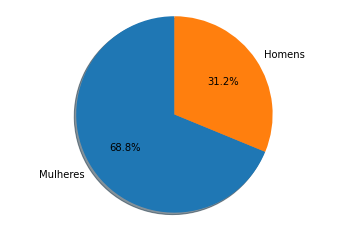

In [466]:
# plotando dados referentes a porcentagem de homens e mulheres docentes na região sudeste, para uma amostra 'x'

## A intenção com essa análise é entender a distribuição de sexo sobre a matéria de matemática, respondendo a pergunta: são homens a maioria de professores de matemática?

labels = 'Mulheres', 'Homens'
sizes = dados_1['Sexo'].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

[Text(0, 0, '272'),
 Text(0, 0, '749'),
 Text(0, 0, '31359'),
 Text(0, 0, '467620')]

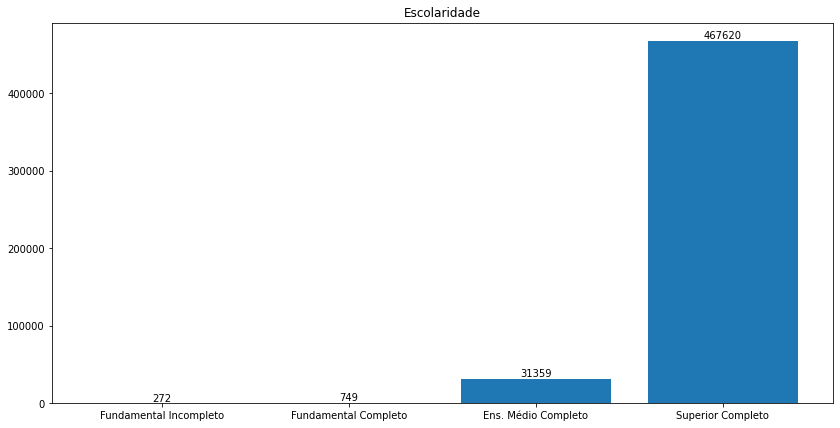

In [467]:
## Verificando a escolaridade dos professores

df_esc = dados_1.copy()
df_esc.loc[df_esc['Grau Escolaridade'] == 1, ['Grau Escolaridade']] = 'Fundamental Incompleto'
df_esc.loc[df_esc['Grau Escolaridade'] == 2, ['Grau Escolaridade']] = 'Fundamental Completo'
df_esc.loc[df_esc['Grau Escolaridade'] == 3, ['Grau Escolaridade']] = 'Ens. Médio Completo'
df_esc.loc[df_esc['Grau Escolaridade'] == 4, ['Grau Escolaridade']] = 'Superior Completo'

escolaridade = df_esc['Grau Escolaridade'].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(14)
ax.set_title("Escolaridade")

x = escolaridade.sort_values().index
y = escolaridade.sort_values().values

bars =  ax.bar(x, y)
ax.bar_label(bars)

<AxesSubplot:xlabel='Idade'>

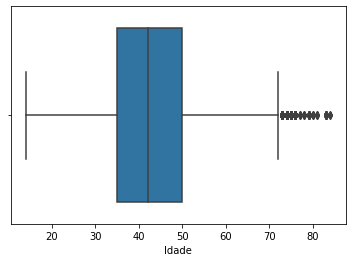

In [468]:
## Vamos entender como estão os dados de média dentro deste dataset, respondendo a pergunta: Qual é a média de idade dos professores?

fig, ax = plt.subplots()
sns.boxplot(x=dados_1['Idade'])

In [469]:
dados_1['Idade'].mean()

42.42847

[Text(0, 0, '15320'),
 Text(0, 0, '15395'),
 Text(0, 0, '16030'),
 Text(0, 0, '16117'),
 Text(0, 0, '16283'),
 Text(0, 0, '16285'),
 Text(0, 0, '16601'),
 Text(0, 0, '16983'),
 Text(0, 0, '17248'),
 Text(0, 0, '18176'),
 Text(0, 0, '18245'),
 Text(0, 0, '18407'),
 Text(0, 0, '19182'),
 Text(0, 0, '19637'),
 Text(0, 0, '21330')]

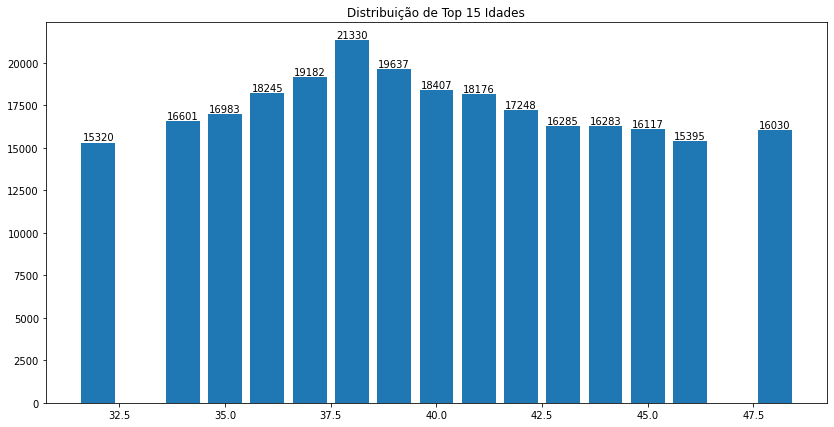

In [470]:
## Distribuição do Top 15 idades por professores

## Entendendo que a média é de 42 anos, será que, então, a maior quantidade de professore se concentra nesta região?

idades = dados_1['Idade'].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(14)
ax.set_title("Distribuição de Top 15 Idades")

x = idades.sort_values().tail(15).index
y = idades.sort_values().tail(15).values

bars =  ax.bar(x, y)
ax.bar_label(bars)



In [471]:
# Ao entender esse número acima, vendo que a maior concentração de professores está entre 37 e 41 anos, qual seria o desvio padrão?

dev = np.std(dados_1['Idade'])

print(f'Podemos notar o desvio padrão de {round(dev)} anos')

Podemos notar o desvio padrão de 10 anos


É importante notar que grande parte dos professores estão na casa do 40 anos, sendo assim não temos muitos novos integrantes dentro dessa amostra.

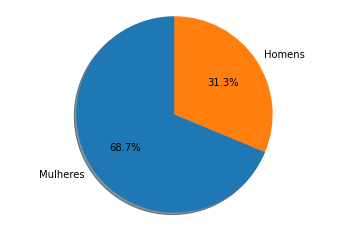

In [472]:
## Da mesma forma, então, vamos avaliar os professores que estariam entrando nesta profissão: começaremos com um range de até 23 anos, dado que um professor pode, em geral, atuar a partir dos 18 anos, e as faculdades de matemática possuem entre 3 a 4 anos de duração.

labels = 'Mulheres', 'Homens'

dados_2 = dados_1.copy()
dados_2 = dados_2.loc[dados_2['Idade'] < 26]

sizes = dados_2['Sexo'].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

[Text(0, 0, '1'),
 Text(0, 0, '12'),
 Text(0, 0, '24'),
 Text(0, 0, '138'),
 Text(0, 0, '334'),
 Text(0, 0, '808'),
 Text(0, 0, '1120'),
 Text(0, 0, '1914'),
 Text(0, 0, '2817'),
 Text(0, 0, '4005'),
 Text(0, 0, '5337')]

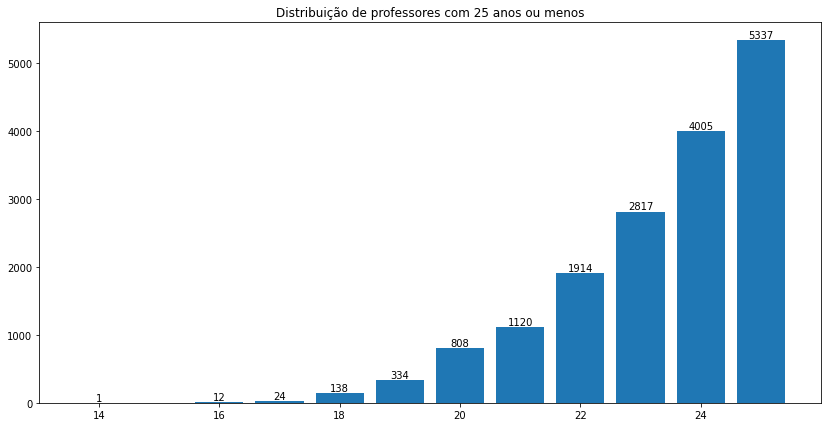

In [473]:
## Aqui observamos um fenômeno interessante: quanto maior a idade, maior o numero de ingressantes. Uma possível explicação para esse fenômeno pode ser o estágio, porém está fora deste escopo analisar esse ponto

idades = dados_2['Idade'].value_counts()

fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(14)
ax.set_title("Distribuição de professores com 25 anos ou menos")

x = idades.sort_values().index
y = idades.sort_values().values

bars =  ax.bar(x, y)
ax.bar_label(bars)

In [474]:
## E quantos são os professores que se especializaram e tem registro nesta amostra? Essa análise ajudará a entender se a especialização faz parte importante da entrada de um novo estudante

não, sim = dados_1['Com espec.'].value_counts()
print(f'{sim} professores possuem especialização, enquanto {não} não possuem, o que equivale a {round(não / (sim+não), 2) * 100} do total para essa categoria')

178423 professores possuem especialização, enquanto 321577 não possuem, o que equivale a 64.0 do total para essa categoria


In [475]:
# Dado que os maiores modelos são os de educação básica dos anos finais e ensino médio, qual é o percentual dos professores nesses dois modelos, quando a entrada dos professores é de menos de 25 anos?
# Vemos que grande parte desta amostra de professores não está direcionada para a educação básica

a = dados_2['Específico: Anos Finais'].loc[dados_2['Específico: Anos Finais'] == 1].count()
b = dados_2['Específico: Ensino Médio'].loc[dados_2['Específico: Ensino Médio'] == 1].count()

print(f'Anos Finais: {a} \nEnsino Médio: {b}')

Anos Finais: 271 
Ensino Médio: 340


# Analisando modelos para previsão de novos professores

Um grande problema apresentado na região do autor deste notebook é: o número de novos professores de matemática para as vagas na região de Itaquaquecetuba, em São Paulo, é pequeno para a quantidade de aulas que existem atualmente. 

Será que podemos prever se, de acordo com as características dos professores que se cadastram nas diretorias de ensino da região sudeste do país, podemos prever o número de professores que será de matemática, seguindo a premissa (ideia) de suprir a demanda de aulas vagas nesta matéria, e imaginando que a idade de entrada seria até os 25 anos?

In [476]:
# Previsão para o futuro
df1 = dados_1[:1500]
df1 

,Idade,Sexo,Grau Escolaridade,Etnia,Licenciatura,Com espec.,Com mestrado,Matemática,Específico: Anos Finais,Específico: Ensino Médio,Específico: EJA,Específico: Educação Especial,Tipo de Docência,Tipo de Contratação,TP_REGULAMENTACAO
0,33,1,4,1,1,0.0,0.0,1.0,0,0,0,0,1,0.0,1
1,33,1,4,1,1,0.0,0.0,1.0,0,0,0,0,1,0.0,1
2,33,1,4,1,1,0.0,0.0,1.0,0,0,0,0,1,0.0,1
3,33,1,4,1,1,0.0,0.0,1.0,0,0,0,0,1,0.0,1
4,33,1,4,1,1,0.0,0.0,1.0,0,0,0,0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,32,2,4,1,1,0.0,0.0,0.0,0,0,0,0,1,0.0,1
1496,32,2,4,1,1,0.0,0.0,0.0,0,0,0,0,1,0.0,1
1497,32,2,4,1,1,0.0,0.0,0.0,0,0,0,0,1,0.0,1
1498,32,2,4,1,1,0.0,0.0,0.0,0,0,0,0,1,0.0,1


In [477]:
## Seguindo o método de classificação, selecionamos as K melhores colunas

# X = df1.copy()
# X = X.drop(['Matemática'], axis=1)
# y = df1['Matemática'].copy()
# f_class = SelectKBest(chi2, k=15)
# fit = f_class.fit(X,y)
# features = fit.transform(X)

# cols = fit.get_support(indices=True)
# df.iloc[:,cols]

### Analisando com SVM

In [478]:
## teste para descobrir como se comporta o modelo de classificação aos dados do projeto

from sklearn import svm
from sklearn.model_selection import  train_test_split

In [479]:
data = df1.drop('Matemática', axis=1)
target = df1['Matemática']

data.fillna(0, inplace=True)
target.fillna(0, inplace=True)

x = data
y = target


C:\Users\sergi\AppData\Roaming\Python\Python39\site-packages\pandas\core\series.py:4460: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [480]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [481]:
classifier = svm.SVC(C=1.0, probability=True)

In [482]:
classifier.fit(x_train, y_train)

SVC(probability=True)

In [483]:
print(classifier.predict(x_test))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [484]:
classifier.score(x_test, y_test)

0.8644444444444445

In [485]:
classificacao = classifier.predict(data)
df1['classificacao'] = classificacao

df1[['Matemática', 'classificacao']]

<ipython-input-485-514d2e46553a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['classificacao'] = classificacao


,Matemática,classificacao
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1495,0.0,0.0
1496,0.0,0.0
1497,0.0,0.0
1498,0.0,0.0


In [486]:
from sklearn.model_selection import cross_val_score

val_res_clf = cross_val_score(classifier, data, target, cv=10)
val_res_clf

array([0.87333333, 0.87333333, 0.87333333, 0.88      , 0.88      ,
       0.88      , 0.88      , 0.88      , 0.88      , 0.88      ])

In [487]:
#Média da acurácia do modelo usando cross validation

val_res_clf.mean()

0.8779999999999999

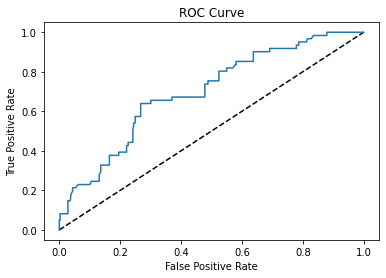

In [488]:
y_pred_prob = classifier.predict_proba(x_test)[:,1]

# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [489]:
df1['diff'] = df1['Matemática'] - df1['classificacao']

df1['diff'].value_counts()

<ipython-input-489-4223518f731b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['diff'] = df1['Matemática'] - df1['classificacao']


0.0    1317
1.0     183
Name: diff, dtype: int64

### Decision Tree Regressor

In [490]:
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

def get_mae(max_leaf_nodes, train_x, test_x, train_y, test_y):
    tester = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    tester.fit(x_train, y_train)
    predict_mae = tester.predict(x_test)
    mae = mean_absolute_error(y_test, predict_mae)
    return mae

In [491]:
candidates_max_nodes = [5, 10, 50, 100, 250, 500, 1000]

error = 1e10
for candidate in candidates_max_nodes:
    erro_no_loop = get_mae(candidate, x_train, x_test, y_train, y_test)
    
    if erro_no_loop < error:
        error = erro_no_loop
        best_tree_size = error
        
print(best_tree_size, candidate)

0.08422222222222224 1000


In [492]:
#teste com o decision tree regressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

tester = DecisionTreeRegressor(max_leaf_nodes=1000) #teste
tester.fit(x_train, y_train)

predicao = tester.predict(x_test)

np.sqrt(mean_squared_error(y_test, predicao))

0.2623853855209536

In [493]:
tester.score(x_test, y_test)

0.4124769972045459

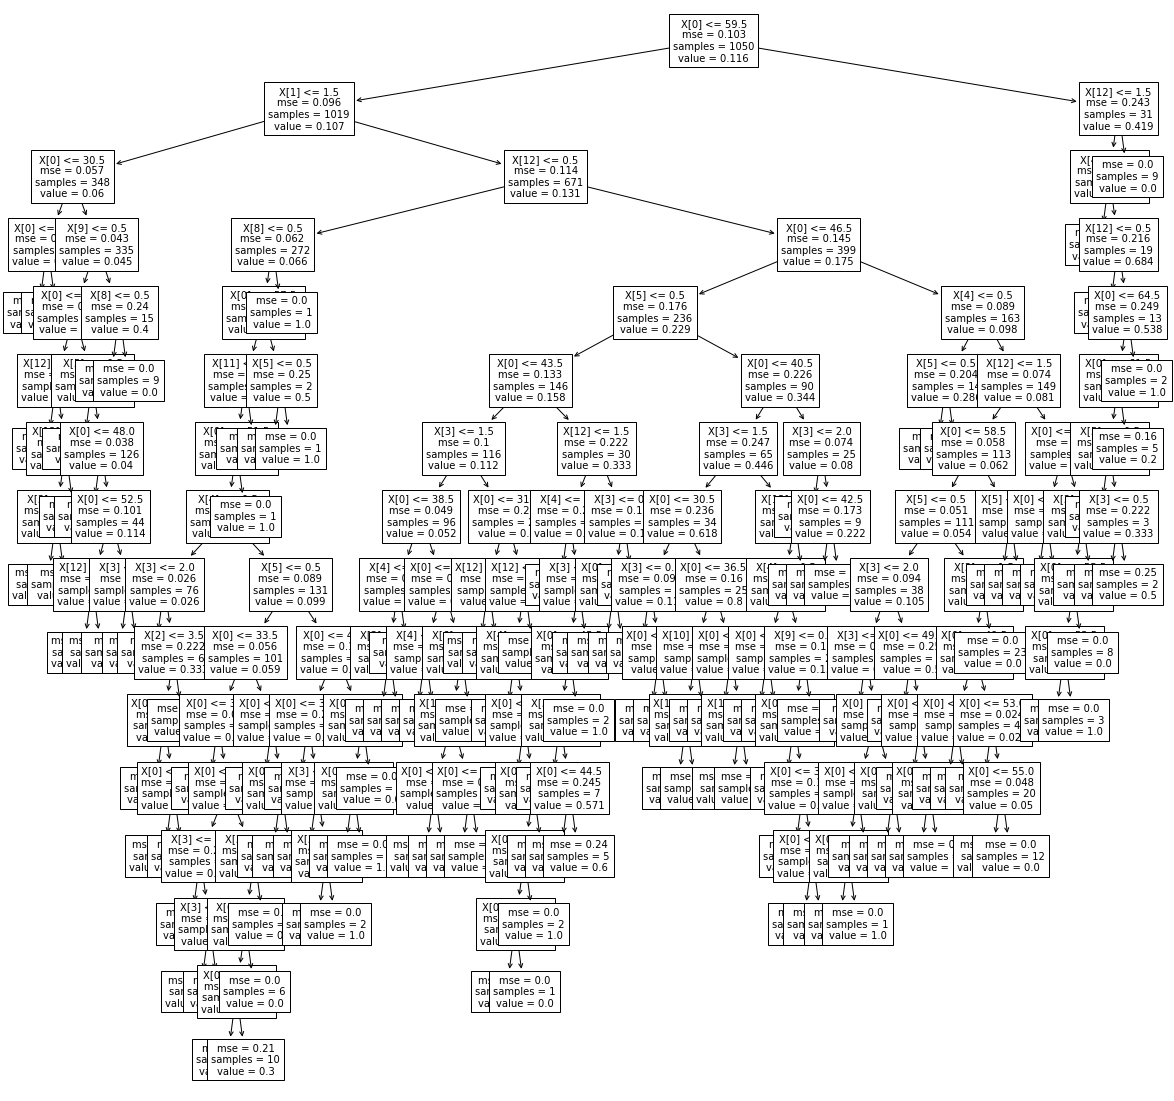

In [494]:
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
plot_tree(tester, fontsize=10)
plt.show()
# plot_tree(tester)

In [495]:
from sklearn.model_selection import cross_val_score

val_res_clf = cross_val_score(tester, data, target, cv=10)
val_res_clf

array([-1.3229893 , -2.37739808, -2.20593197, -1.86567752, -4.12757202,
       -2.86274273, -2.19922132, -0.1784304 , -0.25911841, -1.11173337])

In [496]:
#Média da acurácia do modelo usando cross validation

val_res_clf.mean()

-1.8510815127911826

In [497]:
classificacao = tester.predict(data)
df1['classificacao'] = classificacao

df1[['Matemática', 'classificacao']]

<ipython-input-497-4263dd76b542>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['classificacao'] = classificacao


,Matemática,classificacao
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
1495,0.0,0.0
1496,0.0,0.0
1497,0.0,0.0
1498,0.0,0.0


In [498]:
df1['diff'] = df1['Matemática'] - df1['classificacao']

df1['diff'].value_counts().to_frame()

<ipython-input-498-ab543f373148>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['diff'] = df1['Matemática'] - df1['classificacao']


,diff
0.000000,1326
-0.200000,34
1.000000,19
-0.111111,12
-0.500000,12
0.111111,10
-0.125000,10
-0.300000,8
-0.375000,8
0.500000,8


### Random Forest

In [499]:
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

def get_mae(max_leaf_nodes, train_x, test_x, train_y, test_y):
    rf = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
    rf.fit(x_train, y_train)
    predict_mae = rf.predict(x_test)
    mae = mean_absolute_error(y_test, predict_mae)
    return mae

In [500]:
candidates_max_nodes = [5, 10, 50, 100, 250, 500, 1000]

error = 1e10
for candidate in candidates_max_nodes:
    erro_no_loop = get_mae(candidate, x_train, x_test, y_train, y_test)
    
    if erro_no_loop < error:
        error = erro_no_loop
        best_tree_size = error
        
print(best_tree_size, candidate)

0.08222222222222222 1000


In [501]:
#Usando randomforest Classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=1000, 
    random_state=10, 
    criterion='gini', 
    max_depth=1000, 
    min_samples_leaf=2
)

rf.fit(x_train, y_train)

pred2 = rf.predict(x_test)

np.sqrt(mean_squared_error(y_test, pred2))

0.28674417556808757

In [502]:
ms = rf.score(x_test, y_test) 

print("Exatidão (Accuracy): {0:.4f}".format(ms))

Exatidão (Accuracy): 0.9178


In [503]:
#Verificação do comportamento do modelo para determinados "trechos" do dataset

from sklearn.model_selection import cross_val_score

val_res_clf = cross_val_score(rf, data, target, cv=10)
val_res_clf

array([0.86      , 0.88      , 0.82      , 0.88      , 0.84      ,
       0.89333333, 0.88      , 0.88      , 0.84      , 0.88      ])

In [504]:
#Média da acurácia do modelo usando cross validation

val_res_clf.mean()

0.8653333333333334

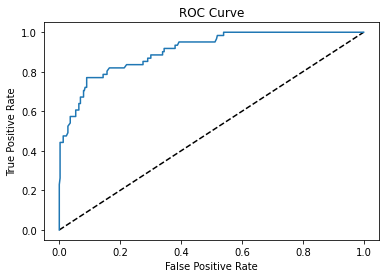

In [505]:
y_pred_prob = rf.predict_proba(x_test)[:,1]

# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [506]:
probabilidade = rf.predict_proba(data)[:,1]
classificacao = rf.predict(data)

df1['probabilidade'] = probabilidade
df1['classificacao'] = classificacao

df1[['Matemática', 'probabilidade', 'classificacao']]

<ipython-input-506-5a6918966757>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['probabilidade'] = probabilidade
<ipython-input-506-5a6918966757>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['classificacao'] = classificacao


,Matemática,probabilidade,classificacao
0,1.0,0.608784,1.0
1,1.0,0.608784,1.0
2,1.0,0.608784,1.0
3,1.0,0.608784,1.0
4,1.0,0.608784,1.0
...,...,...,...
1495,0.0,0.098336,0.0
1496,0.0,0.098336,0.0
1497,0.0,0.098336,0.0
1498,0.0,0.098336,0.0


In [507]:
from sklearn.metrics import confusion_matrix, classification_report

# matriz de confusao
print(confusion_matrix(y_test, rf.predict(x_test)))

# outras metricas
print(classification_report(y_test, rf.predict(x_test)))

[[386   3]
 [ 34  27]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       389
         1.0       0.90      0.44      0.59        61

    accuracy                           0.92       450
   macro avg       0.91      0.72      0.77       450
weighted avg       0.92      0.92      0.91       450



In [508]:
df1['diff'] = df1['Matemática'] - df1['classificacao']

df1['diff'].value_counts()

<ipython-input-508-4223518f731b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['diff'] = df1['Matemática'] - df1['classificacao']


 0.0    1399
 1.0      95
-1.0       6
Name: diff, dtype: int64

### Naive Bayes

In [509]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

modelo_v1 = GaussianNB()

modelo_v1.fit(x_train, y_train.ravel())

GaussianNB()

In [510]:
nb_predict_train = modelo_v1.predict(x_test)

print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_train)))

Exatidão (Accuracy): 0.2467


### Logistic Regression



In [511]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

logit = LogisticRegression()

In [512]:
logit.fit(x_train, y_train)

c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [513]:
y_pred = logit.predict(x_test)

print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Exatidão (Accuracy): 0.8644


In [514]:
# acuracia
logit.score(x_test, y_test)

# matriz de confusao
print(confusion_matrix(y_test, y_pred))

# outras metricas
print(classification_report(y_test, y_pred))

[[389   0]
 [ 61   0]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       389
         1.0       0.00      0.00      0.00        61

    accuracy                           0.86       450
   macro avg       0.43      0.50      0.46       450
weighted avg       0.75      0.86      0.80       450



c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


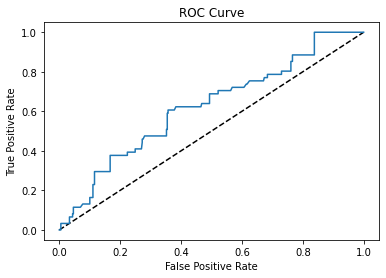

In [515]:
y_pred_prob = logit.predict_proba(x_test)[:,1]

# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [516]:
val_res_logit = cross_val_score(logit, data, target, cv=2)
val_res_logit
val_res_logit.mean()

c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

0.8593333333333333

## Testando o modelo com os dados novos do dataset

O modelo que, por testes, melhor obteve resultados para prever o novo número de professores de matemática, a partir de características de idade, sexo, e até mesmo em relação a outras matérias, é o modelo de random forest.

In [598]:
#Verificando quantos professores, a partir do conjunto de dados, serão da matéria de matemática
df2 = dados_1[3001:6001].sample(n=100)

data = df2.drop('Matemática', axis=1)
target = df2['Matemática']

data.fillna(0, inplace=True)
target.fillna(0, inplace=True)

x = data
y = target

In [635]:
pred1 = rf.predict(data)

np.sqrt(mean_squared_error(target, pred1))

0.469041575982343

In [636]:
print(pred1.sum(), '|', rf.score(data, target), '|', np.unique(pred1, return_counts=True))

8.0 | 0.78 | (array([0., 1.]), array([92,  8], dtype=int64))


In [637]:
print(round((df2['Matemática'].sum()/df2['Matemática'].count())*100, 2), '% do total da contagem é de professores de Matemática')

20.0 % do total da contagem é de professores de Matemática


In [638]:
probabilidade = rf.predict_proba(data)[:,1]

df2['Probabilidade'] = probabilidade
df2['Predict'] = pred1

df2.index = np.arange(1, len(df2) + 1)

# pd.set_option("max_rows", None)
df2[['Matemática', 'Predict', 'Probabilidade']]

,Matemática,Predict,Probabilidade
1,0.0,0.0,0.079831
2,0.0,0.0,0.113205
3,0.0,0.0,0.021144
4,1.0,0.0,0.196932
5,1.0,0.0,0.037179
...,...,...,...
96,0.0,0.0,0.072788
97,0.0,0.0,0.052371
98,0.0,0.0,0.103862
99,0.0,0.0,0.048926


In [639]:
df2['Matemática'].sum()

20.0

In [640]:
df2['Predict'].sum()

8.0

In [641]:
df2['Diff'] = df2['Matemática'] - df2['Predict']

df2['Diff'].value_counts()

 0.0    78
 1.0    17
-1.0     5
Name: Diff, dtype: int64

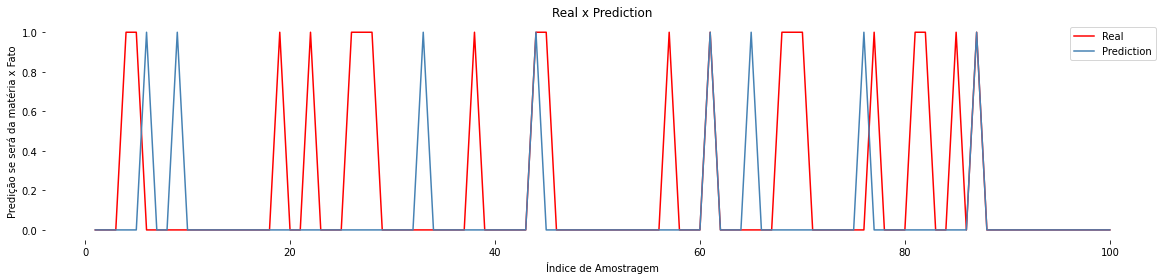

In [642]:
plt.figure(figsize=(20, 4))

sns.lineplot(data = df2[:1000], x = df2[:1000].index, y = 'Matemática', label = 'Real', color = 'red')
sns.lineplot(data = df2[:1000], x = df2[:1000].index, y = 'Predict', label = 'Prediction', color = 'steelblue')
plt.title('Real x Prediction')
plt.xlabel('Índice de Amostragem')
plt.ylabel('Predição se será da matéria x Fato')
sns.despine(bottom = True, left = True)

In [643]:
# Seguindo a linha de entender os erros e acertos de predição, e o quanto o modelo pode ser preciso, verificamos essa diferença
difference_pred = df2[['Matemática', 'Predict']].loc[df2['Matemática'] != df2['Predict']]
beautiful_pred = df2[['Matemática', 'Predict']].loc[df2['Matemática'] == df2['Predict']]
n_of_rows = df2['Matemática'].count()

print('A porcentagem de acerto do modelo foi de {}%, com {} erros, em uma amostragem de {} dados'.format(
      (round(
      (beautiful_pred['Predict'].count() / (beautiful_pred['Predict'].count() + difference_pred['Predict'].count())
      ) * 100, 2)),
      difference_pred['Predict'].count(),
    n_of_rows
    )
)


A porcentagem de acerto do modelo foi de 78.0%, com 22 erros, em uma amostragem de 100 dados


In [644]:
# Predições Corretas do Modelo
beautiful_pred.value_counts().to_frame()

,,0
Matemática,Predict,
0.0,0.0,75
1.0,1.0,3


In [645]:
# Predições Ruins
difference_pred.value_counts().to_frame()

,,0
Matemática,Predict,
1.0,0.0,17
0.0,1.0,5


In [646]:
#saving model
import pickle
pickle.dump(clf, open('F:\Arquivos do Sistema SSD\Python\Análise de Dados\microdados_censo_escolar_2020\estudo_python_microdados_educacao_basica_2020/clf_model_teachers.pkl', 'wb'))